In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [3]:
browns_csvs = os.listdir('Browns_CSVs')
browns_dfs = [pd.read_csv('Browns_CSVs/'+csv) for csv in browns_csvs]
jags_csvs = os.listdir('Jaguars_CSVs')
jags_dfs = [pd.read_csv('Jaguars_CSVs/'+csv) for csv in jags_csvs]
for df in browns_dfs:
    df['Date'] = pd.to_datetime(df['Date'])
for df in jags_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

mega_Browns_df = pd.concat(browns_dfs)
mega_Jags_df = pd.concat(jags_dfs)

In [4]:
browns_data = mega_Browns_df['clean_Tweet']
jags_data = mega_Jags_df['clean_Tweet']

In [6]:
browns_bags_of_words = []
for index, row in mega_Browns_df['clean_Tweet'].iteritems(): 
    bag = row.split(' ')
    browns_bags_of_words.append(bag)

te_browns = TransactionEncoder()
te_ary_browns = te_browns.fit(browns_bags_of_words).transform(browns_bags_of_words)
df_browns = pd.DataFrame(te_ary_browns, columns=te_browns.columns_)

browns_fp_res = apriori(df_browns, min_support=0.02, use_colnames=True)

b_2_item_sets = browns_fp_res.loc[(browns_fp_res['itemsets'].str.len() >= 2)]

b_2_item_sets

,support,itemsets
83,0.020070,"(cade, york)"
84,0.021235,"(nick, chubb)"
85,0.033754,"(woods, joe)"
86,0.022234,"(kevin, stefanski)"


In [7]:
jags_bags_of_words = []
for index, row in mega_Jags_df['clean_Tweet'].iteritems(): 
    bag = row.split(' ')
    jags_bags_of_words.append(bag)

te_jags = TransactionEncoder()
te_ary_jags = te_jags.fit(jags_bags_of_words).transform(jags_bags_of_words)
df_jags = pd.DataFrame(te_ary_jags, columns=te_jags.columns_)

jags_fp_res = apriori(df_jags, min_support=0.02, use_colnames=True)

j_2_item_sets = jags_fp_res.loc[(jags_fp_res['itemsets'].str.len() >= 2)]

j_2_item_sets

,support,itemsets
85,0.023540,"(pederson, doug)"
86,0.020879,"(travis, etienne)"
87,0.041006,"(game, jaguars)"
88,0.025101,"(vs, game)"
89,0.039040,"(jacksonville, jaguars)"
90,0.035223,"(vs, jaguars)"
91,0.054656,"(trevor, lawrence)"


In [7]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

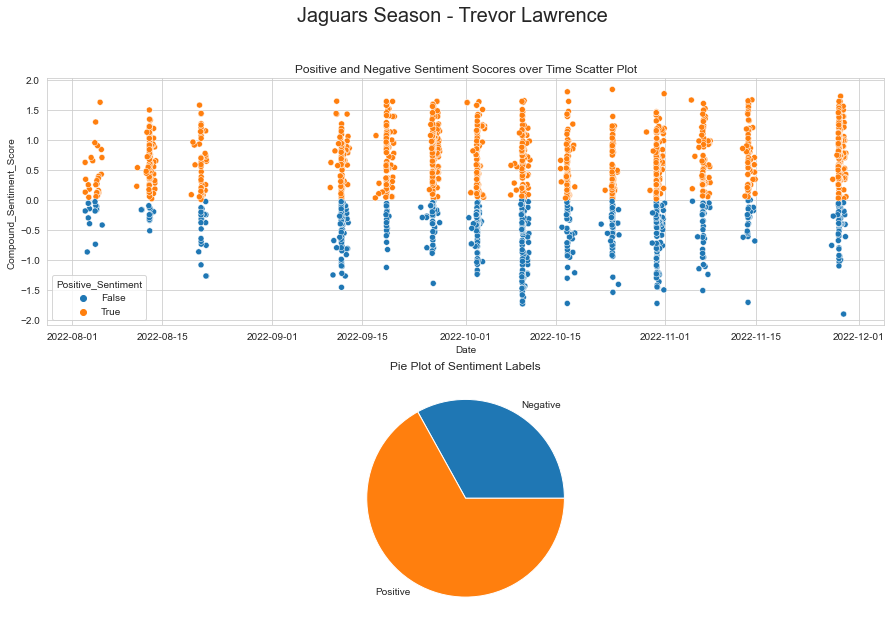

In [10]:
make_scatter_and_pie_figure(mega_Jags_df[(mega_Jags_df['clean_Tweet'].str.contains('trevor') | mega_Jags_df['clean_Tweet'].str.contains('lawrence'))], 'Jaguars Season - Trevor Lawrence', save=True)

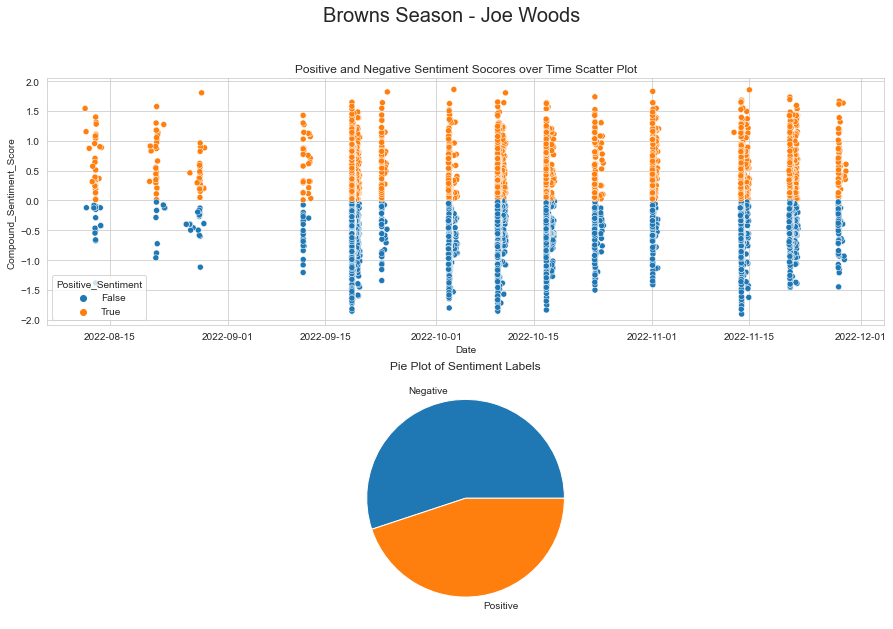

In [9]:
make_scatter_and_pie_figure(mega_Browns_df[(mega_Browns_df['clean_Tweet'].str.contains('joe') | mega_Browns_df['clean_Tweet'].str.contains('woods'))], 'Browns Season - Joe Woods', save=True)

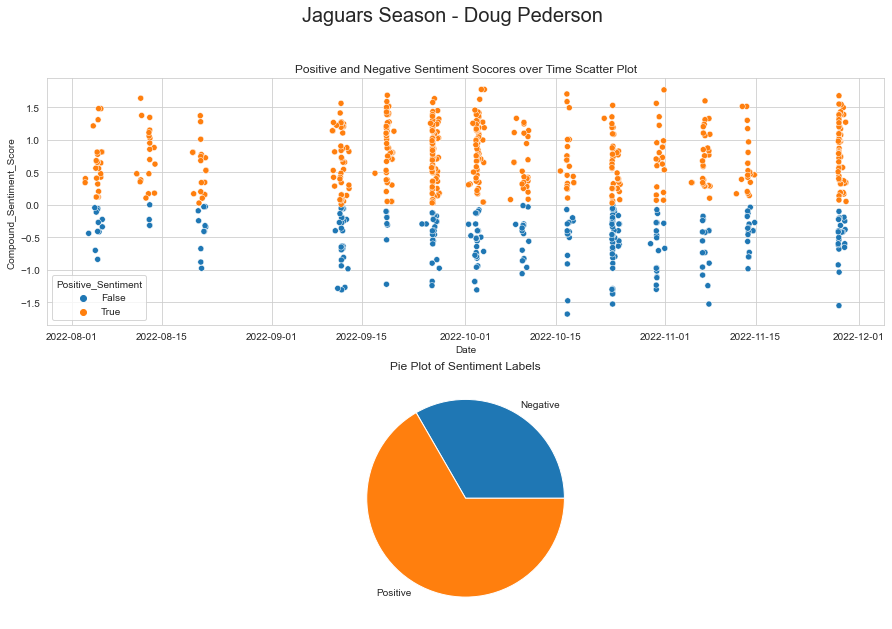

In [17]:
make_scatter_and_pie_figure(mega_Jags_df[(mega_Jags_df['clean_Tweet'].str.contains('doug') | mega_Jags_df['clean_Tweet'].str.contains('pederson'))], 'Jaguars Season - Doug Pederson')